In [1]:
import pandas as pd
import re
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("IMDB Dataset.csv")  # Make sure this file has 'review' and 'sentiment' columns
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

In [6]:

df['review'] = df['review'].apply(clean_text)

In [7]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
log_reg = LogisticRegression()
nb = MultinomialNB()


In [10]:
log_reg.fit(X_train_vec, y_train)
nb.fit(X_train_vec, y_train)


MultinomialNB()

In [11]:
# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg.predict(X_test_vec)))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb.predict(X_test_vec)))

Logistic Regression Accuracy: 0.8856
Naive Bayes Accuracy: 0.8517


In [12]:
pickle.dump(log_reg, open("log_reg_model.pkl", "wb"))
pickle.dump(nb, open("nb_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [22]:
# Load models for prediction
import pickle

# Load the vectorizer and model
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("log_reg_model.pkl", "rb"))  # or "nb_model.pkl"


In [23]:
def predict_sentiment(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    text_vector = vectorizer.transform([text])
    sentiment = model.predict(text_vector)
    return "Positive" if sentiment[0] == 1 else "Negative"


In [24]:
print(predict_sentiment("I hate you"))  # Expected: Negative
print(predict_sentiment("I love you"))  # Expected: Positive


Negative
Positive


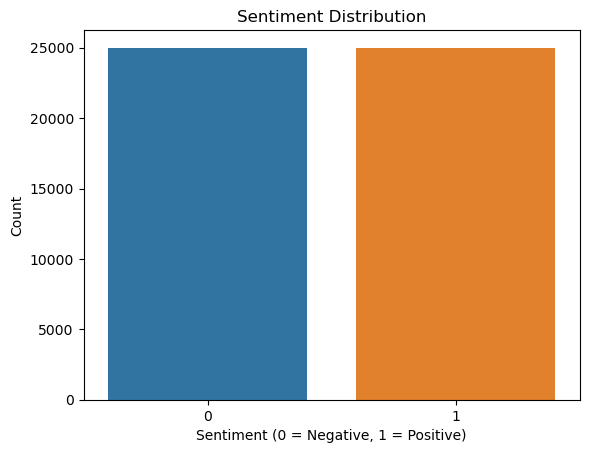

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


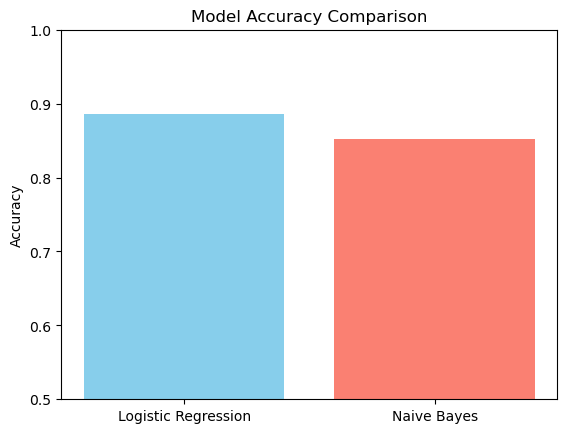

In [27]:
from sklearn.metrics import accuracy_score

# Assuming you've already predicted:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_vec))
nb_acc = accuracy_score(y_test, nb.predict(X_test_vec))

# Plotting
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [log_reg_acc, nb_acc]

plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.show()


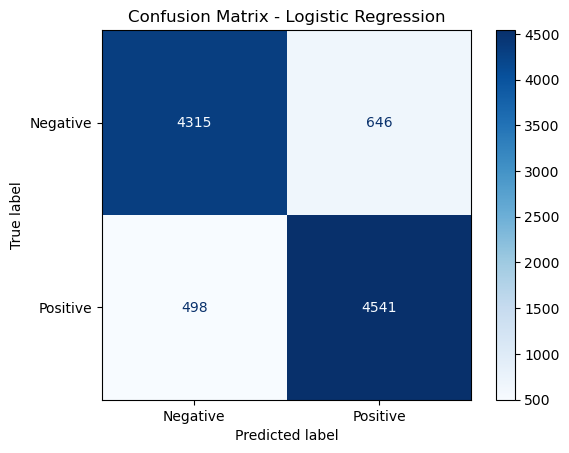

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For Logistic Regression
cm = confusion_matrix(y_test, log_reg.predict(X_test_vec))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
